In [107]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('data_processed.csv', index_col=0)
data.drop('Оценка Drom', axis=1, inplace=True)
data.head()

,Название,Год,Топливо,Объем двигателя,Мощность,Коробка передач,Привод,Цвет,Пробег,Руль,Цена
0,Kia Mohave,2020,дизель,3.0,260.0,автомат,4WD,серый,26000.0,левый,4650000
1,Hyundai Santa Fe,2018,дизель,2.2,200.0,автомат,4WD,серый,81000.0,левый,2850000
2,Toyota RAV4,2022,бензин,2.0,173.0,вариатор,4WD,черный,1.0,левый,4000000
3,Jeep Gladiator,2020,бензин,3.6,285.0,автомат,4WD,черный,15000.0,левый,6750000
4,Jeep Wrangler,2018,бензин,2.0,272.0,автомат,4WD,черный,37700.0,левый,5200000


In [94]:
# Так как некоторых цветов очень мало, а самих цветов мгного, я предлагаю заменить на черный/белый/серый/холодный/тёплый

cold = set(data['Цвет'].unique()) - {'черный', 'серый', 'белый', 'коричневый', 'бордовый',
                                     'красный', 'бежевый', 'желтый',  'оранжевый', 'золотистый'}
warm = {'коричневый', 'бордовый', 'красный', 'бежевый', 'желтый',  'оранжевый', 'золотистый'}
data['холодный цвет'] = data['Цвет'].apply(lambda x: 1 if x in cold else 0)
data['теплый цвет'] = data['Цвет'].apply(lambda x: 1 if x in warm else 0)
data['черный цвет'] = data['Цвет'].apply(lambda x: 1 if x =='черный' else 0)
data['белый цвет'] = data['Цвет'].apply(lambda x: 1 if x =='белый' else 0)
data['серый цвет'] = data['Цвет'].apply(lambda x: 1 if x =='серый' else 0)

In [183]:
# Кодируем остальные категориальные признаки
onehot = OneHotEncoder(sparse=False)
X = onehot.fit_transform(data[['Привод', 'Топливо', 'Коробка передач', 'Руль']])

In [184]:
cat = list(onehot.categories_[0]) + list(onehot.categories_[1]) + list(onehot.categories_[2]) + list(onehot.categories_[3])

In [185]:
data[cat] = X

In [186]:
# логарифмируем численные фичи:
data['log years old'] = np.log(2023 - data['Год']+1)
data['log volume'] = np.log(data['Объем двигателя'] + 1)
data['log price'] = np.log(data['Цена'])
data['log power'] = np.log(data['Мощность'])
data['log price'] = np.log(data['Цена'])
data['log mileage'] = np.log(data['Пробег']+1)

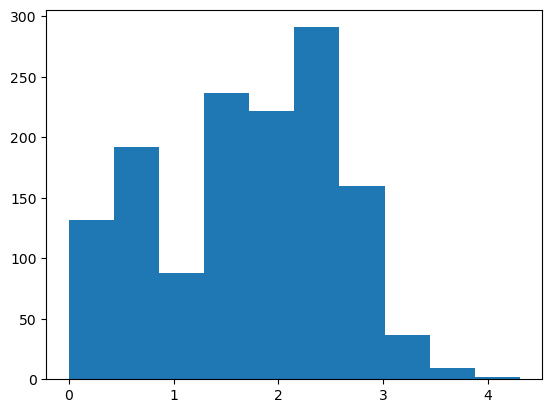

In [187]:
plt.hist(np.log(data['years old']+1));

In [189]:
data.columns

Index(['Название', 'Год', 'Топливо', 'Объем двигателя', 'Мощность',
       'Коробка передач', 'Привод', 'Цвет', 'Пробег', 'Руль', 'Цена',
       'холодный цвет', 'теплый цвет', 'черный цвет', 'белый цвет',
       'серый цвет', 'log volume', 'log price', 'log power', 'years old',
       'log years old', 'log mileage', '4WD', 'задний', 'передний', 'бензин',
       'дизель', 'электро', 'автомат', 'вариатор', 'механика', 'робот',
       'левый', 'правый'],
      dtype='object')

In [190]:
data.to_csv('data_reprocessed.csv')